In [2]:
#model eka test  for one image

In [ ]:
import joblib

model=joblib.load('brain_tumor_kmeans.sav')
tumorLabel=4#tumer eka dena color eke number eka

In [ ]:
import cv2
from matplotlib import pyplot as plt
imagePath='test_images/0 (1322).jpg'

imgOriginal=cv2.imread(imagePath)#color
img=cv2.imread(imagePath,0)#gray 
height,width=img.shape
imgFlatten=img.reshape(height*width,1)
#testing image size is not equal to training image size
#because pixcel eka mona category ekeda balanawa.
#only one feature 
#only one datapoint.

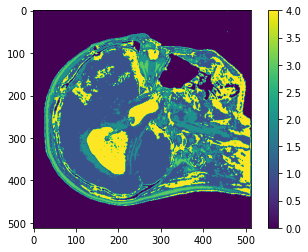

In [7]:
labels=model.predict(imgFlatten)
#labels 5
#no of values 512 * 512
labels2D=labels.reshape(height,width)

plt.imshow(labels2D)
plt.colorbar()
plt.show()

In [8]:
import numpy as np

array=np.array([2,547,5,7,87,8,5])
#print(array==5)
#if 5 is exsit it is true
array2=(array==5)
print(array2)

[False False  True False False False  True]


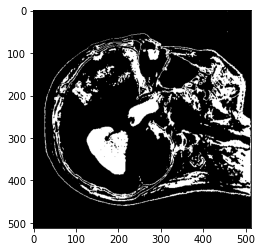

In [9]:
mask=(labels2D==tumorLabel)#tumer label eke ewa 1/true othes are false/0
#print(mask)
plt.imshow(mask,cmap='gray')#white and others black
plt.savefig('mask.png')
plt.show()

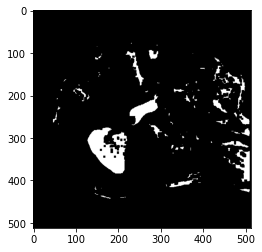

In [96]:
#converting the binary array into a opencv supported image
tumorExtracted=np.array((mask*255),dtype=np.uint8)#0-255 <= 0-1 *255 #unsigned int 8 bits
#tumorExtracted=np.bitwise_and(mask,img)

#norpological operations
kernal=np.ones((5,5),np.uint8)#5 by 5 kotuwak
#podi podi sudu keli ain karanawa
#erosion-kernal shift karagena yana gaman okkoma ewa white pixcels ahu unama white karanawa. anith ewa ahu onoth black karanawa
#dilation-anith petta(sudu pata ekk hri onuth kernal eka center eka white karanawa)
tumorExtracted=cv2.erode(tumorExtracted,kernal,iterations=1)#must control iteration
plt.imshow(tumorExtracted,cmap='gray')
plt.show()

In [99]:
imageoriginal=cv2.imread(imagePath)

In [102]:
contours, hierarchy = cv2.findContours(tumorExtracted, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

print('no. contours:',len(contours))
#cv2.drawContours(imageoriginal, contours, -1, (0,255,255), 3)#adinne color image eke original ekema

#measure the area of each contour
for cnt in contours:
     area=cv2.contourArea(cnt)
     #print(area)
    #sort and draw contour
    # if(area>7000 and area<7500):
     if(area>500):
        cv2.drawContours(imageoriginal, [cnt], -1, (0,255,255), 3)
         #it is not always true.so we use niroplogical theory    
        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(imageoriginal,(x,y),(x+w,y+h),(0,255,0),2)
        cv2.rectangle(imageoriginal,(x,y),(x+120,y-40),(0,255,0),-1)
        cv2.putText(imageoriginal,"TUMOR",(x+10,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2)
       
        
#clearly show
cv2.imshow('LIVE',imageoriginal)
cv2.waitKey(0)
cv2.destroyAllWindows()
#plt.imshow(imageoriginal)
#plt.show()
#print(contours[577])#ponits wla bounding point

no. contours: 125


In [103]:
#must segment and detect and show it
#must black and white
#ekama color eka thiyana areas wen karanawa(white/black)
contours, hierarchy = cv2.findContours(tumorExtracted, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

print('no. contours:',len(contours))

for cnt in contours:
    #cv2.drawContours(frame, [cnt], 0, (0,255,255), 3)
    area=cv2.contourArea(cnt)
    #print(area)
    if(area>500):

        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(imageoriginal,(x,y),(x+w,y+h),(0,255,0),2)
        cv2.rectangle(imageoriginal,(x,y),(x+120,y-40),(0,255,0),-1)
        cv2.putText(imageoriginal,"TUMOR",(x+10,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2)

no. contours: 125


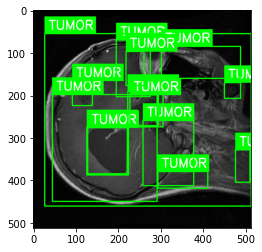

In [89]:
plt.imshow(imgOriginal,cmap='gray')
plt.show()